In [33]:
import pandas as pd
import numpy as np
import pymc as pm

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_df = pd.read_csv('data/freMTPL2freq.csv', index_col='IDpol')
data_df

,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
IDpol,,,,,,,,,,,
1.0,1,0.10000,D,5,0,55,50,B12,Regular,1217,R82
3.0,1,0.77000,D,5,0,55,50,B12,Regular,1217,R82
5.0,1,0.75000,B,6,2,52,50,B12,Diesel,54,R22
10.0,1,0.09000,B,7,0,46,50,B12,Diesel,76,R72
11.0,1,0.84000,B,7,0,46,50,B12,Diesel,76,R72
...,...,...,...,...,...,...,...,...,...,...,...
6114326.0,0,0.00274,E,4,0,54,50,B12,Regular,3317,R93
6114327.0,0,0.00274,E,4,0,41,95,B12,Regular,9850,R11
6114328.0,0,0.00274,D,6,2,45,50,B12,Diesel,1323,R82


In [5]:
print(data_df.info())  # Overview of dataset
print(data_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 678013 entries, 1.0 to 6114330.0
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ClaimNb     678013 non-null  int64  
 1   Exposure    678013 non-null  float64
 2   Area        678013 non-null  object 
 3   VehPower    678013 non-null  int64  
 4   VehAge      678013 non-null  int64  
 5   DrivAge     678013 non-null  int64  
 6   BonusMalus  678013 non-null  int64  
 7   VehBrand    678013 non-null  object 
 8   VehGas      678013 non-null  object 
 9   Density     678013 non-null  int64  
 10  Region      678013 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 62.1+ MB
None
       ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus VehBrand  \
IDpol                                                                           
1.0          1      0.10    D         5       0       55          50      B12   
3.0          1      0.77    D   

In [6]:
# Perform quick data cleaning (renaming columns)
data_df.columns = [col.strip() for col in data_df.columns]  # Trim whitespace from column names
data_df

,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
IDpol,,,,,,,,,,,
1.0,1,0.10000,D,5,0,55,50,B12,Regular,1217,R82
3.0,1,0.77000,D,5,0,55,50,B12,Regular,1217,R82
5.0,1,0.75000,B,6,2,52,50,B12,Diesel,54,R22
10.0,1,0.09000,B,7,0,46,50,B12,Diesel,76,R72
11.0,1,0.84000,B,7,0,46,50,B12,Diesel,76,R72
...,...,...,...,...,...,...,...,...,...,...,...
6114326.0,0,0.00274,E,4,0,54,50,B12,Regular,3317,R93
6114327.0,0,0.00274,E,4,0,41,95,B12,Regular,9850,R11
6114328.0,0,0.00274,D,6,2,45,50,B12,Diesel,1323,R82


In [7]:
# Check for missing values
missing_counts = data_df.isnull().sum()
missing_percent = (missing_counts / len(data_df)) * 100
missing_summary = pd.DataFrame({"Missing Count": missing_counts, "Missing %": missing_percent})
print(missing_summary.sort_values(by="Missing Count", ascending=False))

            Missing Count  Missing %
ClaimNb                 0        0.0
Exposure                0        0.0
Area                    0        0.0
VehPower                0        0.0
VehAge                  0        0.0
DrivAge                 0        0.0
BonusMalus              0        0.0
VehBrand                0        0.0
VehGas                  0        0.0
Density                 0        0.0
Region                  0        0.0


In [9]:
# Check categorical variable levels
categorical_cols = data_df.select_dtypes(include=['object', 'category']).columns
cat_levels = {col: data_df[col].nunique() for col in categorical_cols}
cat_levels_df = pd.DataFrame.from_dict(cat_levels, orient='index', columns=['Unique Levels'])
cat_levels_df.sort_values(by='Unique Levels', ascending=False, inplace=True)
print(cat_levels_df)

          Unique Levels
Region               22
VehBrand             11
Area                  6
VehGas                2


In [10]:
# Identify column types
numeric_vars = data_df.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = data_df.select_dtypes(include=['object', 'category']).columns

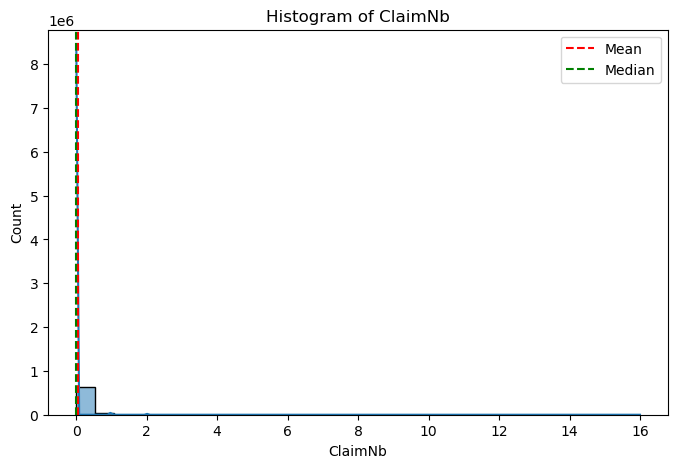

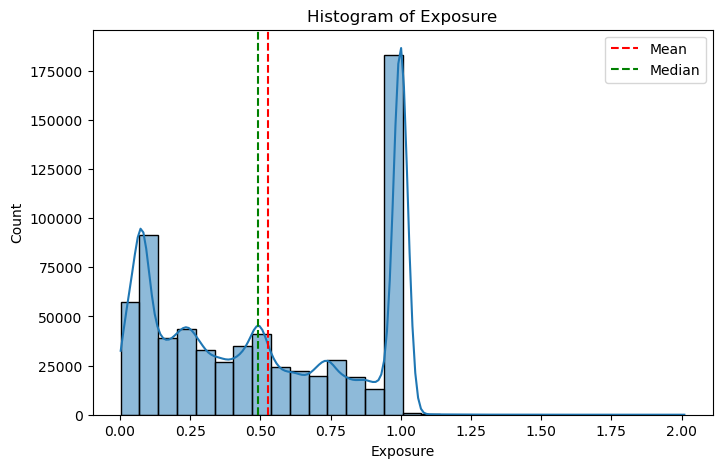

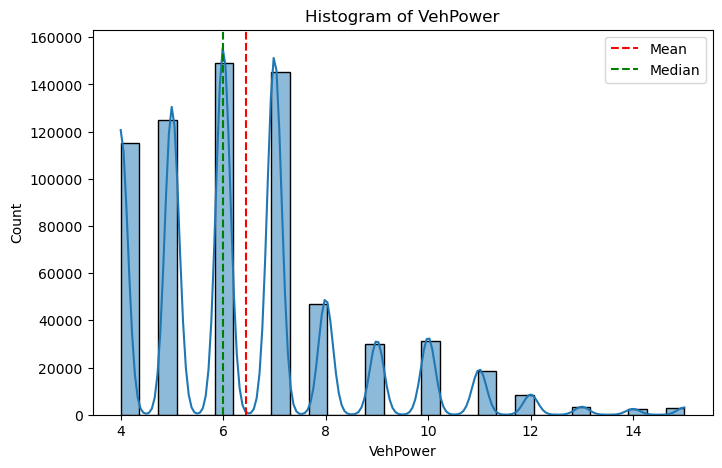

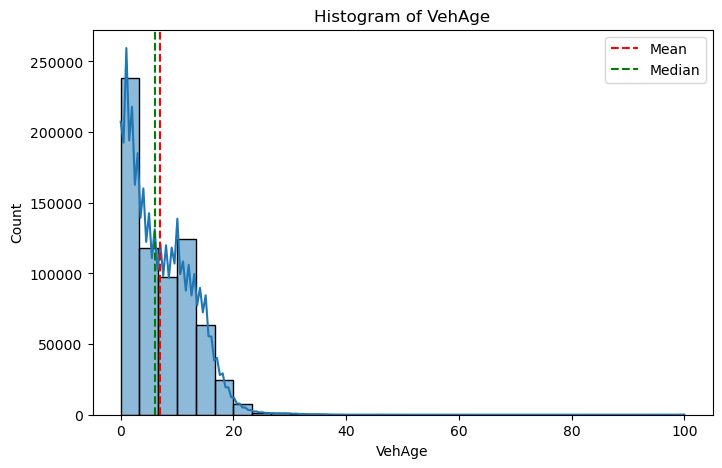

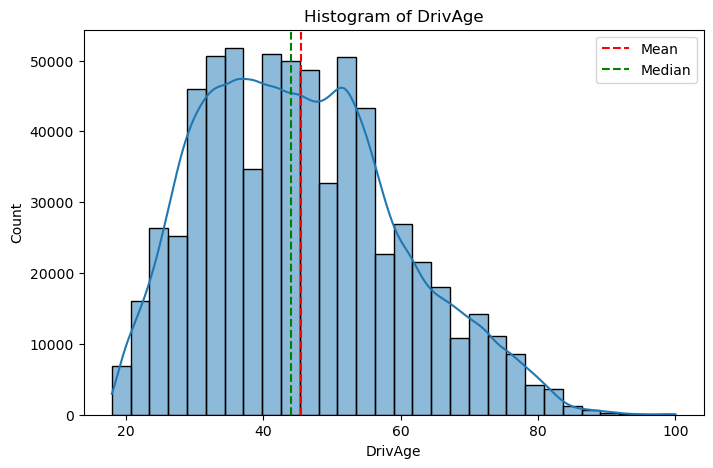

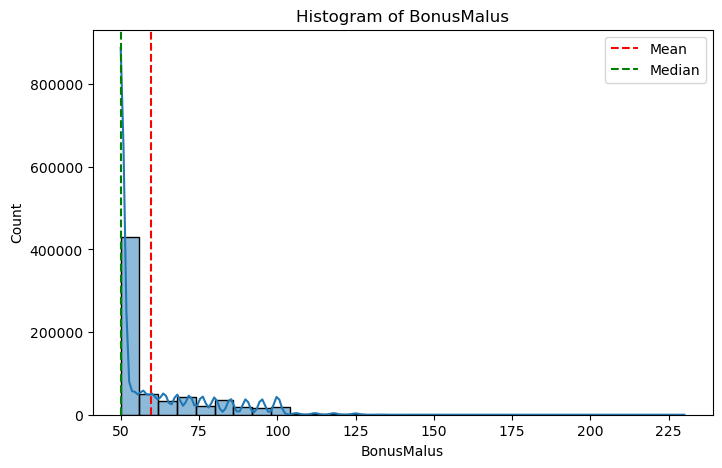

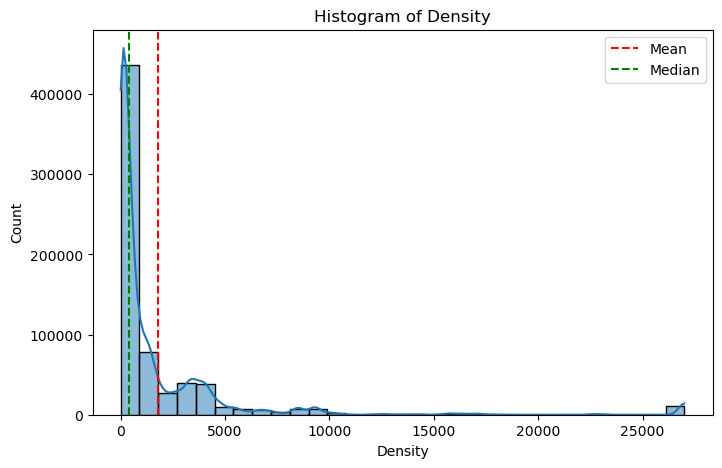

In [13]:
# Numeric Variables
for var in numeric_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_df[var], bins=30, kde=True)
    plt.axvline(data_df[var].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
    plt.axvline(data_df[var].median(), color='green', linestyle='dashed', linewidth=1.5, label='Median')
    plt.title(f'Histogram of {var}')
    plt.legend()
    plt.show()

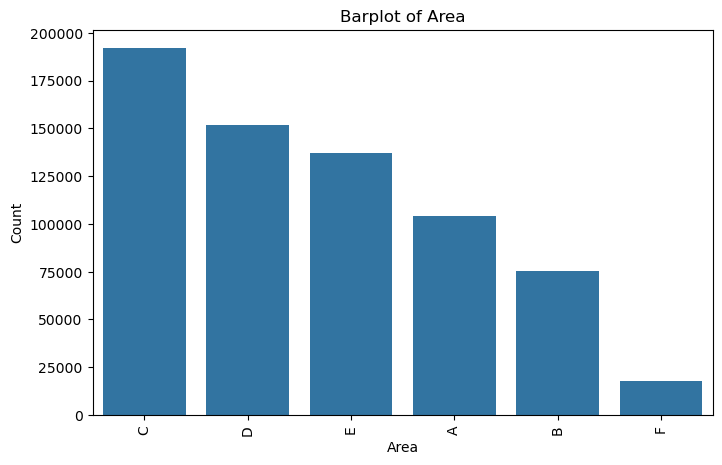

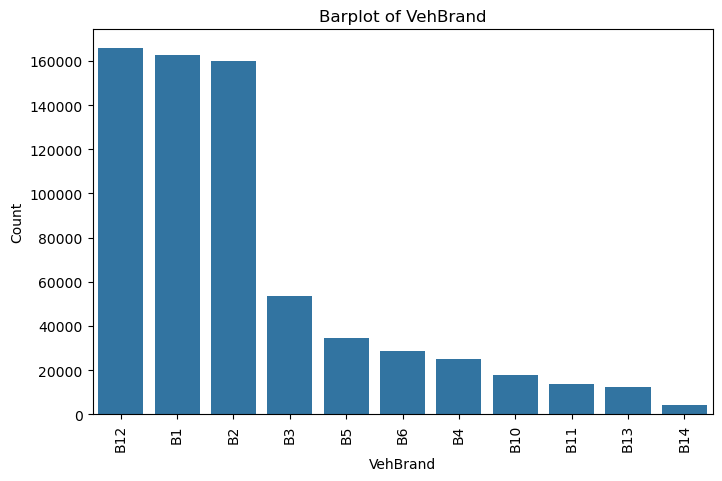

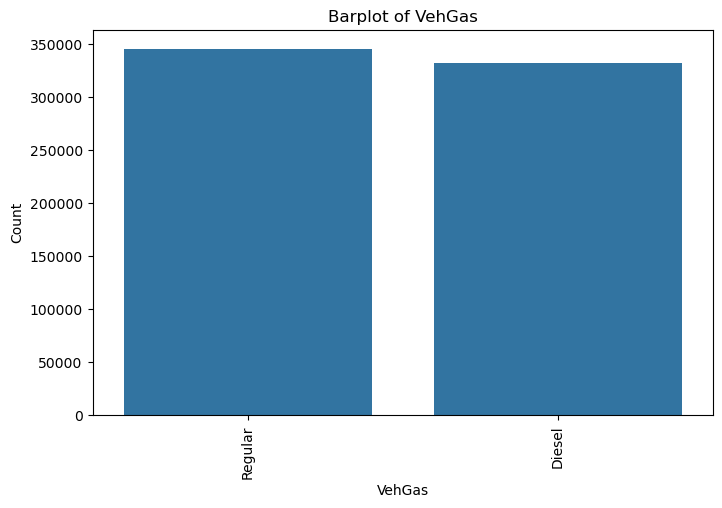

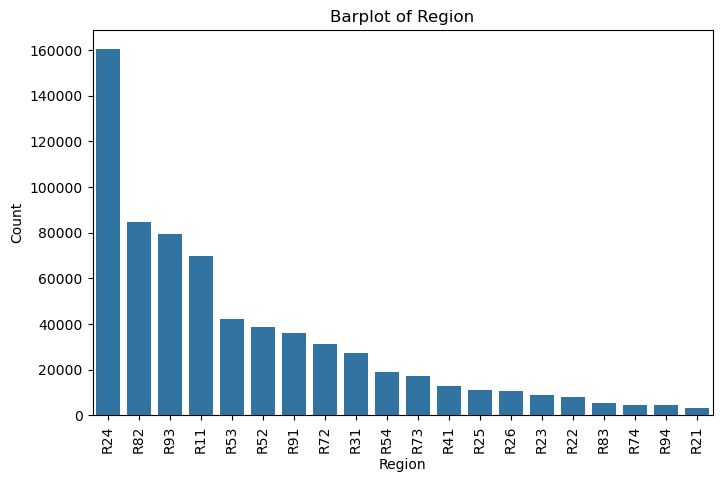

In [14]:
# Categorical Variables
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    top_values = data_df[var].value_counts().nlargest(20)  # Show only top 20 categories
    sns.barplot(x=top_values.index, y=top_values.values)
    plt.xticks(rotation=90)
    plt.title(f'Barplot of {var}')
    plt.ylabel("Count")
    plt.xlabel(var)
    plt.show()

In [34]:
# Define predictor variables
X = data_df[['VehGas', 'DrivAge']]
X

,VehGas,DrivAge
IDpol,,
1.0,Regular,55
3.0,Regular,55
5.0,Diesel,52
10.0,Diesel,46
11.0,Diesel,46
...,...,...
6114326.0,Regular,54
6114327.0,Regular,41
6114328.0,Diesel,45


In [35]:
# Convert categorical variables if needed
X = pd.get_dummies(X, drop_first=True, dtype=float)
X

,DrivAge,VehGas_Regular
IDpol,,
1.0,55,1.0
3.0,55,1.0
5.0,52,0.0
10.0,46,0.0
11.0,46,0.0
...,...,...
6114326.0,54,1.0
6114327.0,41,1.0
6114328.0,45,0.0


In [36]:
X_scaled = (X - X.mean()) / X.std()
X_scaled

,DrivAge,VehGas_Regular
IDpol,,
1.0,0.672036,0.979934
3.0,0.672036,0.979934
5.0,0.459834,-1.020475
10.0,0.035429,-1.020475
11.0,0.035429,-1.020475
...,...,...
6114326.0,0.601302,0.979934
6114327.0,-0.318242,0.979934
6114328.0,-0.035305,-1.020475


In [43]:
exposure = data_df['Exposure']
exposure

IDpol
1.0          0.10000
3.0          0.77000
5.0          0.75000
10.0         0.09000
11.0         0.84000
              ...   
6114326.0    0.00274
6114327.0    0.00274
6114328.0    0.00274
6114329.0    0.00274
6114330.0    0.00274
Name: Exposure, Length: 678013, dtype: float64

In [44]:
claim_count = data_df['ClaimNb']
claim_count

IDpol
1.0          1
3.0          1
5.0          1
10.0         1
11.0         1
            ..
6114326.0    0
6114327.0    0
6114328.0    0
6114329.0    0
6114330.0    0
Name: ClaimNb, Length: 678013, dtype: int64

In [46]:
with pm.Model() as poisson_model:
    # Priors for coefficients (matching Stan normal(0,1))
    beta = pm.Normal("beta", mu=0, sigma=1, shape=X_scaled.shape[1])
    
    # Prior for intercept
    intercept = pm.Normal("intercept", mu=0, sigma=1)

    # Linear model with offset (log(exposure))
    mu = intercept + pm.math.dot(X_scaled.values, beta) + np.log(exposure)

    # Poisson likelihood
    claim_obs = pm.Poisson("claim_count", mu=pm.math.exp(mu), observed=claim_count)

    # Sample from the prior (equivalent to Stan's prior_PD = TRUE)
    prior_samples = pm.sample_prior_predictive(1000)

    # Sample from posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, cores=4)

Sampling: [beta, claim_count, intercept]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, intercept]


/Users/yashkarle/opt/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 324 seconds.
